In [1]:
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np
import mglearn
from sklearn.preprocessing import StandardScaler

np.set_printoptions(suppress=True)

## PCA去除噪音(noise)和降维

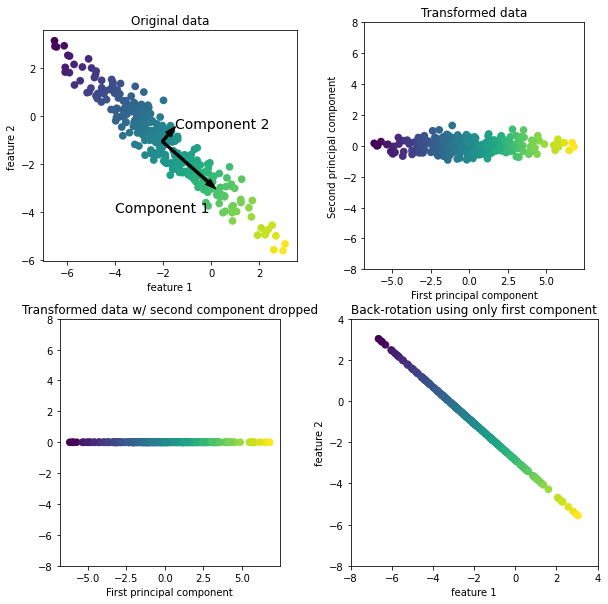

In [2]:
mglearn.plots.plot_pca_illustration()

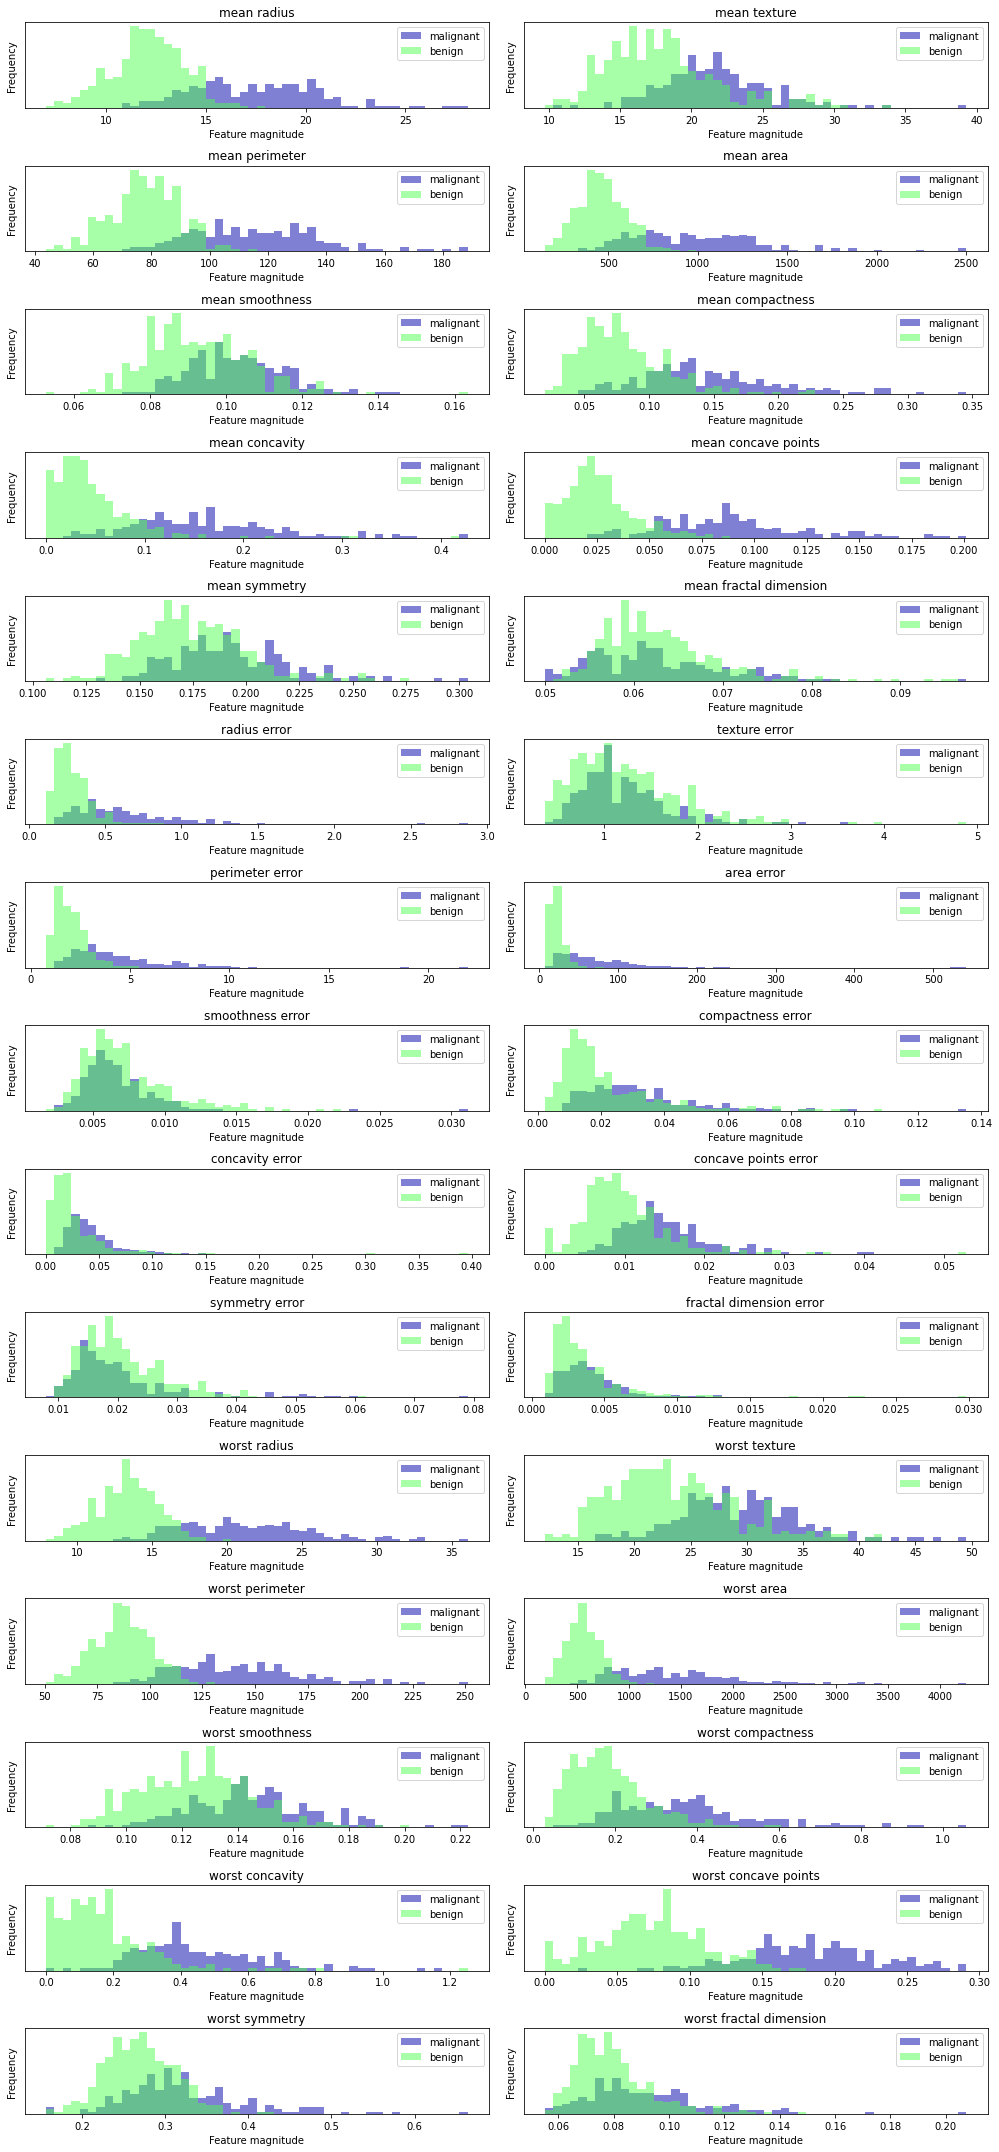

In [3]:
cancer = load_breast_cancer()

fig, axes = plt.subplots(15, 2, figsize=(14, 30))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    ax[i].set_xlabel("Feature magnitude")
    ax[i].set_ylabel("Frequency")
    ax[i].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

In [4]:
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [5]:
cancer.data[:1, :5]

array([[  17.99  ,   10.38  ,  122.8   , 1001.    ,    0.1184]])

In [6]:
X_scaled[:1, :5]

array([[ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633]])

In [7]:
from sklearn.decomposition import PCA
# 保留数据的前两个主成分
pca = PCA(n_components=2)
# 对乳腺癌数据拟合PCA模型
pca.fit(X_scaled)

# 将数据变换到前两个主成分的方向上
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


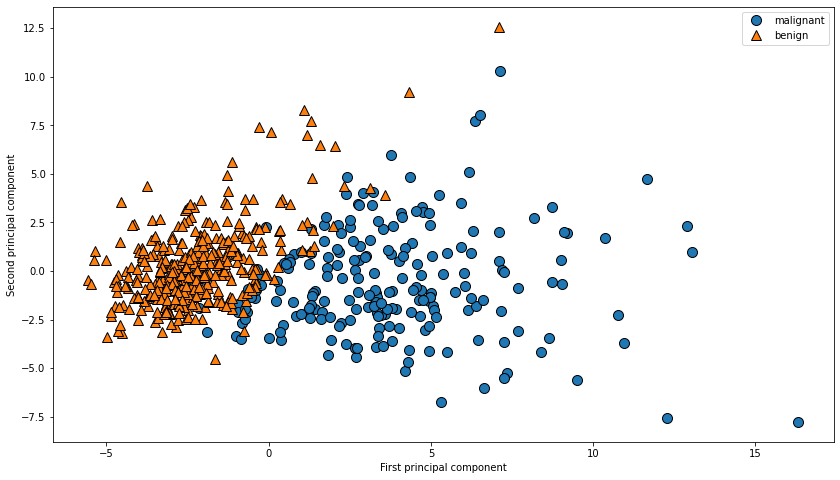

In [8]:
# 对第一个和第二个主成分作图，按类别着色
plt.figure(figsize=(14, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
# plt.gca().set_aspect("equal") # 画布大小设置成相同大小
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

In [9]:
pca.components_.shape

(2, 30)

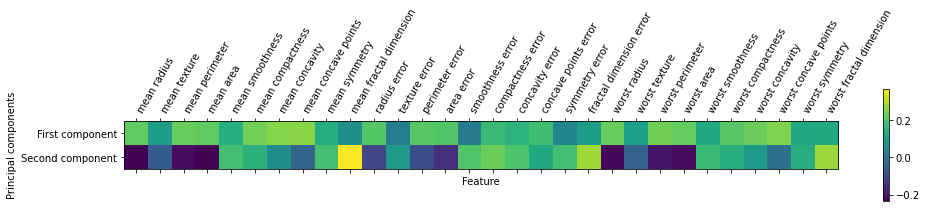

In [10]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")
plt.show()